**Name:**

*   Alex
*   Rafaela Hollanda
*   Yothen
*   Jennifer Garcia

**Course Session: 72977**
**Assignment: Midterm**

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [10]:

hourlydf = pd.read_csv('hourly.csv')
dailydf = pd.read_csv('daily.csv')
weeklydf = pd.read_csv('weekly.csv')

**Long-term Seasonality & Weekly Trends**

**Weekly Returns Analysis** (Alex)


Weekly Returns (first 5 rows):


,Date,Close,Returns
0,06/06/2004 00:00,384.1,NaN
1,13/06/2004 00:00,394.3,2.655558
2,20/06/2004 00:00,401.1,1.724575
3,27/06/2004 00:00,397.8,-0.822737
4,04/07/2004 00:00,407.1,2.337858



Descriptive Statistics for Weekly Returns:


,Returns
count,1108.000000
mean,0.235708
std,2.328095
min,-8.618568
25%,-1.046291
50%,0.340457
75%,1.609522
max,14.106419


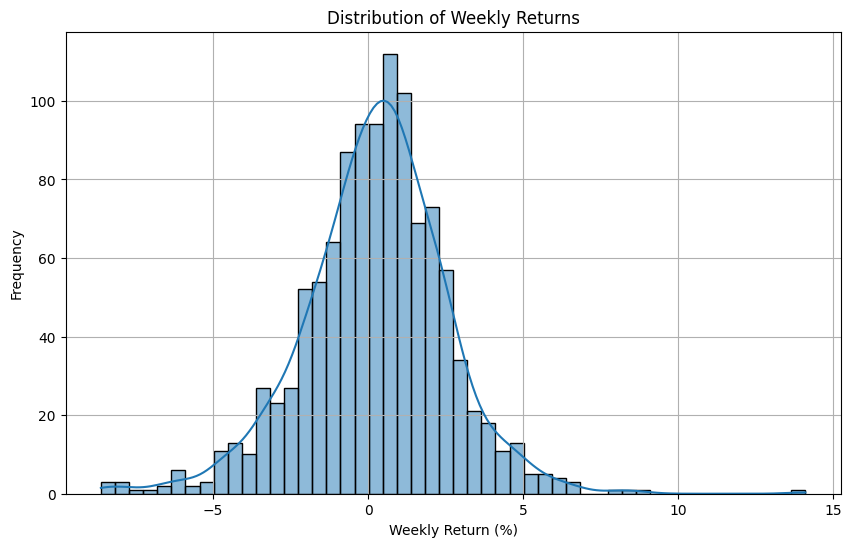

In [11]:
weeklydf['Returns'] = weeklydf['Close'].pct_change() * 100

print('Weekly Returns (first 5 rows):')
display(weeklydf[['Date', 'Close', 'Returns']].head())

print('\nDescriptive Statistics for Weekly Returns:')
display(weeklydf['Returns'].describe())

plt.figure(figsize=(10, 6))
sns.histplot(weeklydf['Returns'].dropna(), bins=50, kde=True)
plt.title('Distribution of Weekly Returns')
plt.xlabel('Weekly Return (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Lag Plot** (Alex)


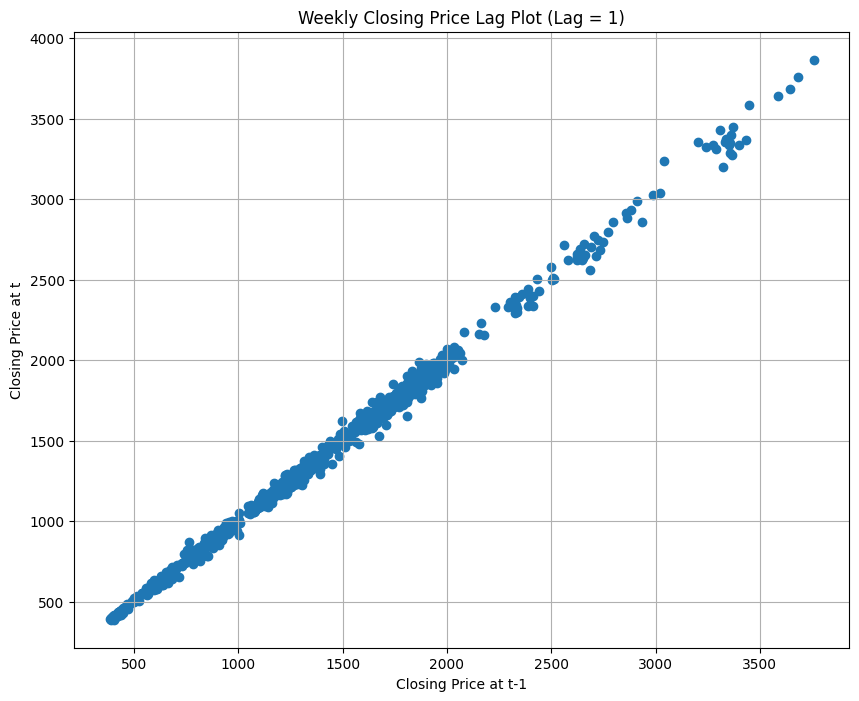

In [12]:
from pandas.plotting import lag_plot

plt.figure(figsize=(10, 8))
lag_plot(weeklydf['Close'], lag=1)
plt.title('Weekly Closing Price Lag Plot (Lag = 1)')
plt.xlabel('Closing Price at t-1')
plt.ylabel('Closing Price at t')
plt.grid(True)
plt.show()

# Optional: You could explore different lags
# plt.figure(figsize=(10, 8))
# lag_plot(weeklydf['Close'], lag=4) # Example for a quarterly lag if weekly data
# plt.title('Weekly Closing Price Lag Plot (Lag = 4)')
# plt.xlabel('Closing Price at t-4')
# plt.ylabel('Closing Price at t')
# plt.grid(True)
# plt.show()

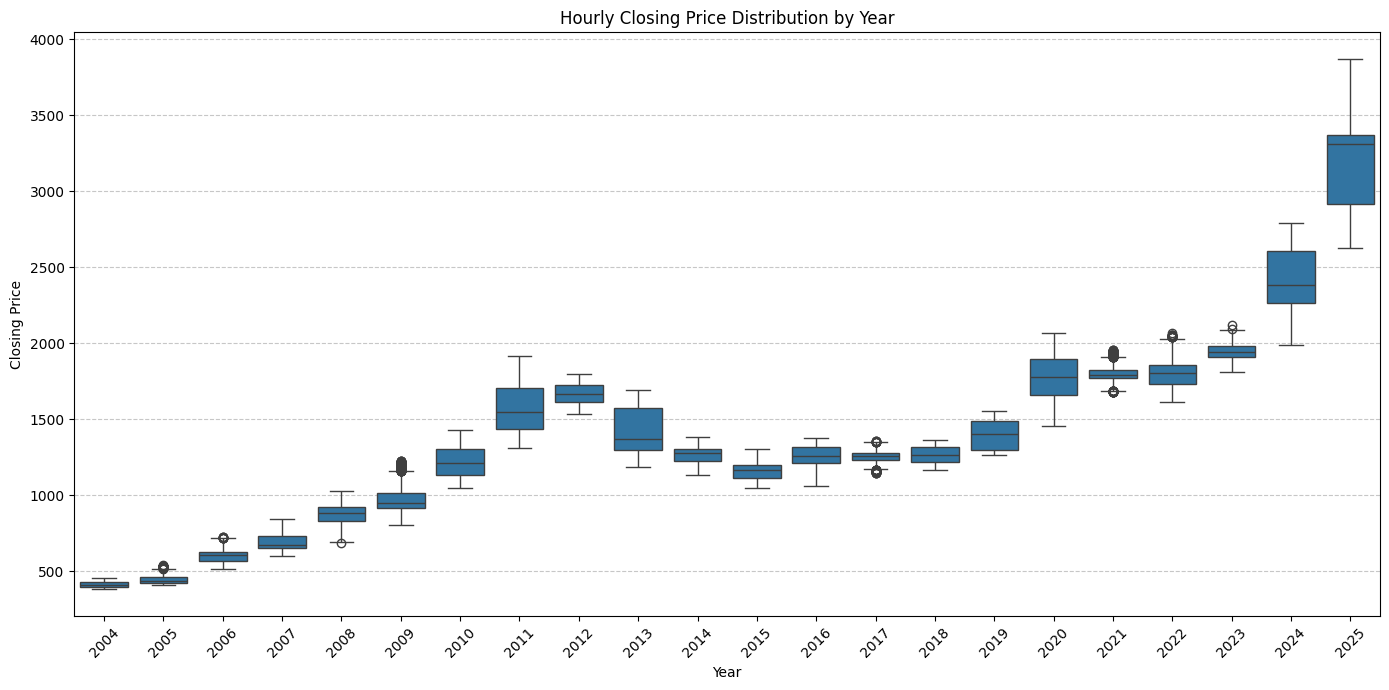

In [15]:
hourlydf['Date'] = pd.to_datetime(hourlydf['Date'], format='%d/%m/%Y %H:%M')
hourlydf['Year'] = hourlydf['Date'].dt.year

plt.figure(figsize=(14, 7))
sns.boxplot(x='Year', y='Close', data=hourlydf)
plt.title('Hourly Closing Price Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
dailydf['Date'] = pd.to_datetime(dailydf['Date'], format='%d/%m/%Y %H:%M')
dailydf['Year'] = dailydf['Date'].dt.year

plt.figure(figsize=(14, 7))
sns.boxplot(x='Year', y='Close', data=dailydf)
plt.title('Daily Closing Price Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

ValueError: time data "11/06/2004 00:00" doesn't match format "%d %m %Y %H:%M", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

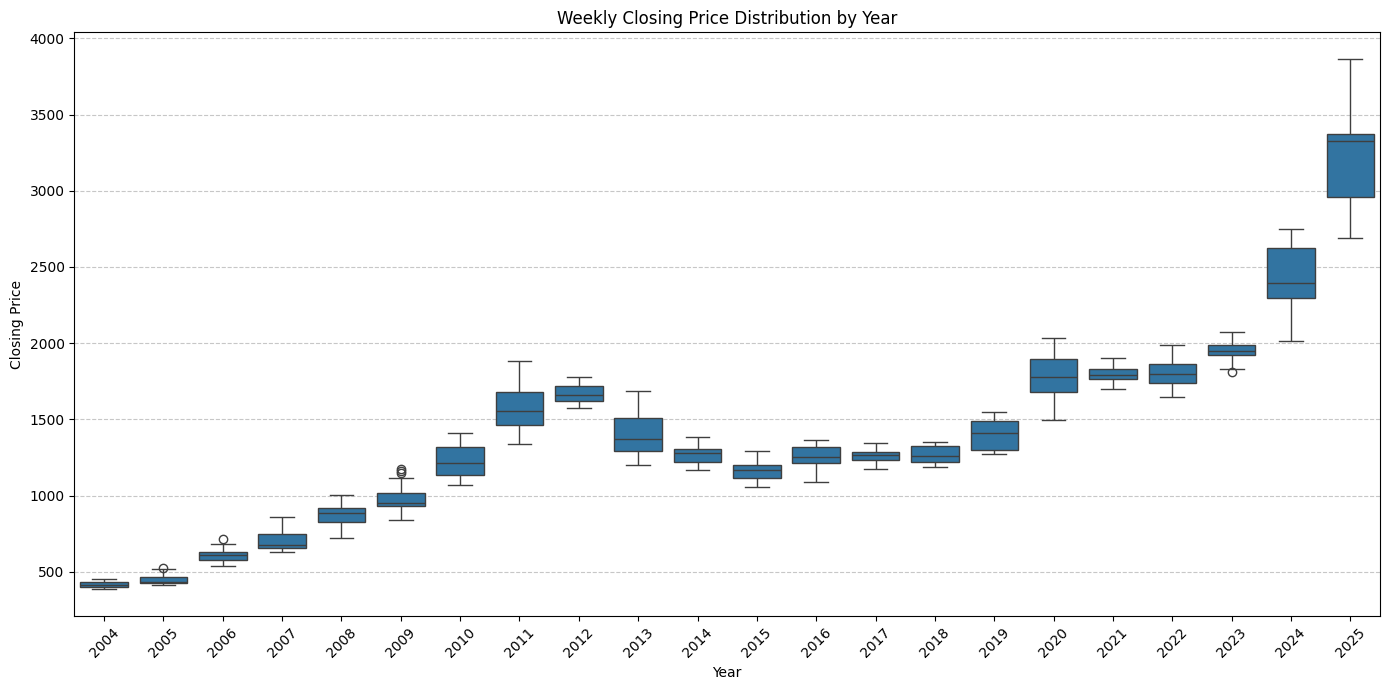

In [17]:
weeklydf['Date'] = pd.to_datetime(weeklydf['Date'], format='%d/%m/%Y %H:%M')
weeklydf['Year'] = weeklydf['Date'].dt.year


plt.figure(figsize=(14, 7))
sns.boxplot(x='Year', y='Close', data=weeklydf)
plt.title('Weekly Closing Price Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:

dailydf['Date'] = pd.to_datetime(dailydf['Date'], format='%d/%m/%Y %H:%M')
hourlydf['Date'] = pd.to_datetime(hourlydf['Date'], format='%d/%m/%Y %H:%M')
weeklydf['Date'] = pd.to_datetime(weeklydf['Date'], format='%d/%m/%Y %H:%M')
dailydf.set_index('Date', inplace=True)
hourlydf.set_index('Date', inplace=True)
weeklydf.set_index('Date', inplace=True)

**Daily Trends & Volume Analysis ( Jennifer ) **
1. Time Series Plot of Daily Closing Prices
2. Distribution of Daily Returns
3. Moving Averages Analysis
4. Daily Volume Analysis over time.

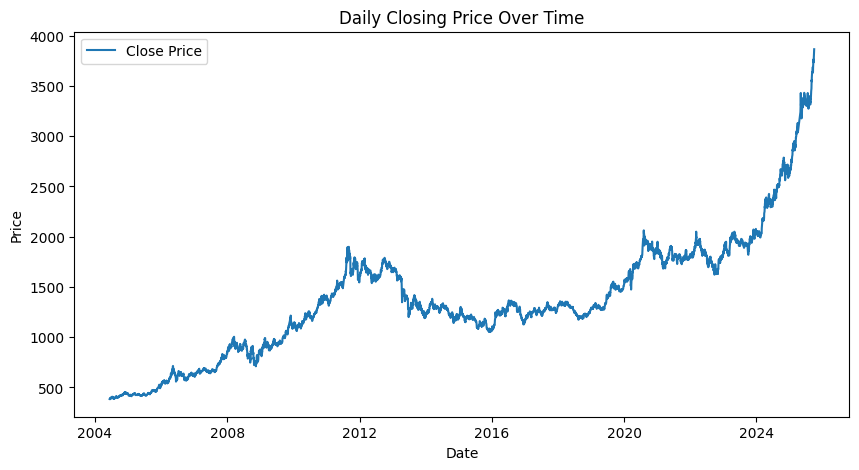

In [19]:
# 1. Daily Close Price Jennifer Garcia
plt.figure(figsize=(10, 5))
plt.plot(dailydf.index, dailydf['Close'], label='Close Price')
plt.title('Daily Closing Price Over Time')
plt.xlabel('Date'); plt.ylabel('Price'); plt.legend(); plt.show()

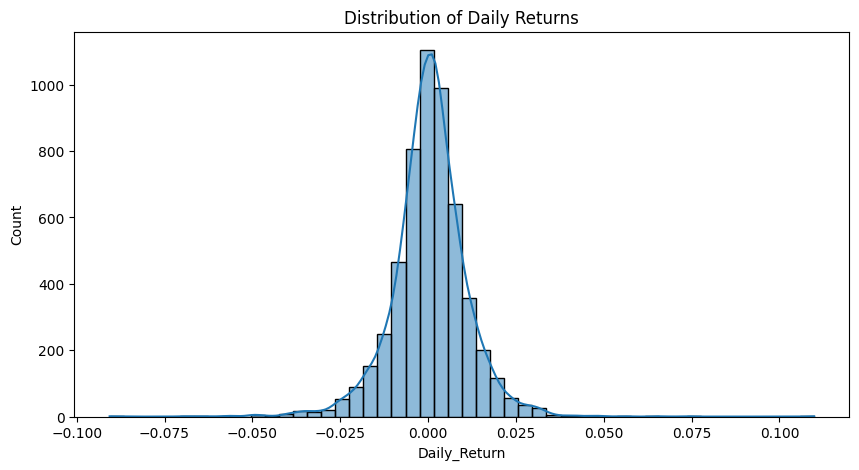

In [20]:
# 2. Daily Returns Histogram Jennifer Garcia
dailydf['Daily_Return'] = dailydf['Close'].pct_change()
plt.figure(figsize=(10, 5))
sns.histplot(dailydf['Daily_Return'].dropna(), bins=50, kde=True)
plt.title('Distribution of Daily Returns'); plt.show()

In [ ]:
# 3. Moving Averages Jennifer Garcia
dailydf['MA50'] = dailydf['Close'].rolling(window=50).mean()
dailydf['MA200'] = dailydf['Close'].rolling(window=200).mean()
plt.figure(figsize=(10, 5))
plt.plot(dailydf.index, dailydf['Close'], label='Close', alpha=0.5)
plt.plot(dailydf.index, dailydf['MA50'], label='50-Day MA')
plt.plot(dailydf.index, dailydf['MA200'], label='200-Day MA')
plt.title('Moving Averages (50 & 200 Days)'); plt.legend(); plt.show()

In [ ]:
# 4. Daily Volume Jennifer Garcia
plt.figure(figsize=(10, 5))
plt.scatter(dailydf.index, dailydf['Volume'], color='orange', alpha=0.6)
plt.title('Daily Trading Volume (Scatter Plot)'); plt.xlabel('Date'); plt.ylabel('Volume'); plt.show()

Jennifer Garcia Findings (Daily Trends):

Trend: The long-term price chart shows a consistent upward trend with notable corrections.

Volume: Spikes in trading volume often precede or coincide with major price reversals.

Moving Averages: The 50-day MA crossing above the 200-day MA (Golden Cross) consistently signaled long-term bullish phases

**SECTION 4 - Statistical relationships across all datasets** (Rafaela)

1. Correlation Heatmap (Open, High, Low, Close, Volume).
2. 30-Day Rolling Volatility (Risk analysis).
3. Scatter Plot: Volume vs. Price Change (Market strength).
4. Cumulative Returns over time.
5. Monthly Distribution Boxplot (Seasonality check).

/tmp/ipython-input-1969841065.py:37: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  combined[f'Returns_{timeframe}'] = combined[f'Close_{timeframe}'].pct_change()
/tmp/ipython-input-1969841065.py:37: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  combined[f'Returns_{timeframe}'] = combined[f'Close_{timeframe}'].pct_change()
/tmp/ipython-input-1969841065.py:37: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values

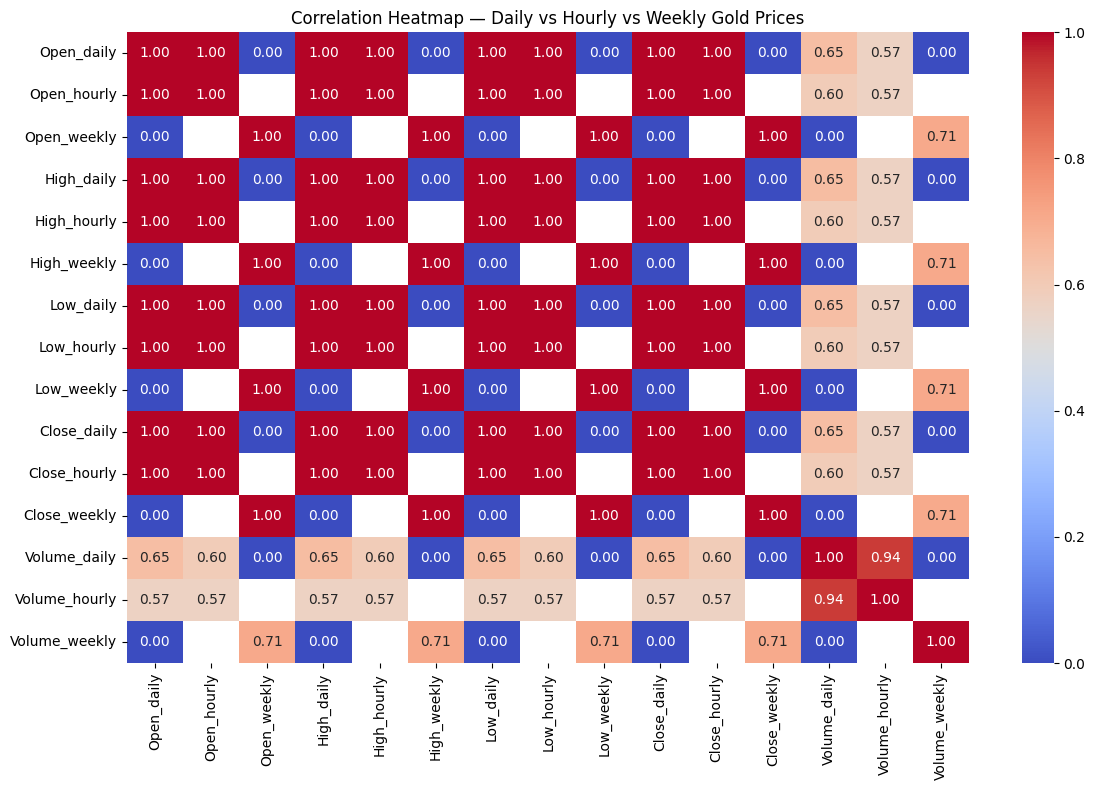

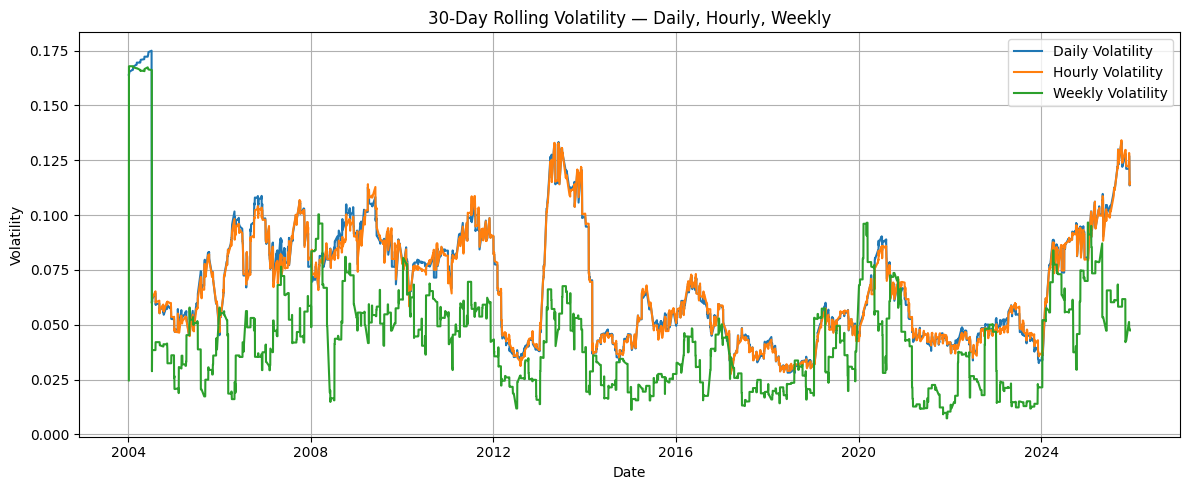

/tmp/ipython-input-1969841065.py:74: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


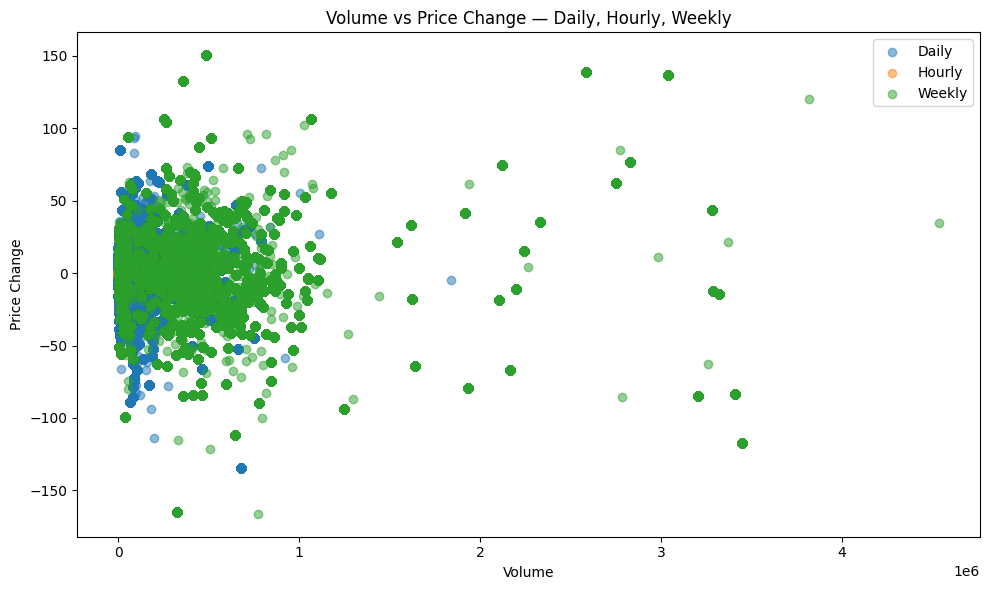

/tmp/ipython-input-1969841065.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


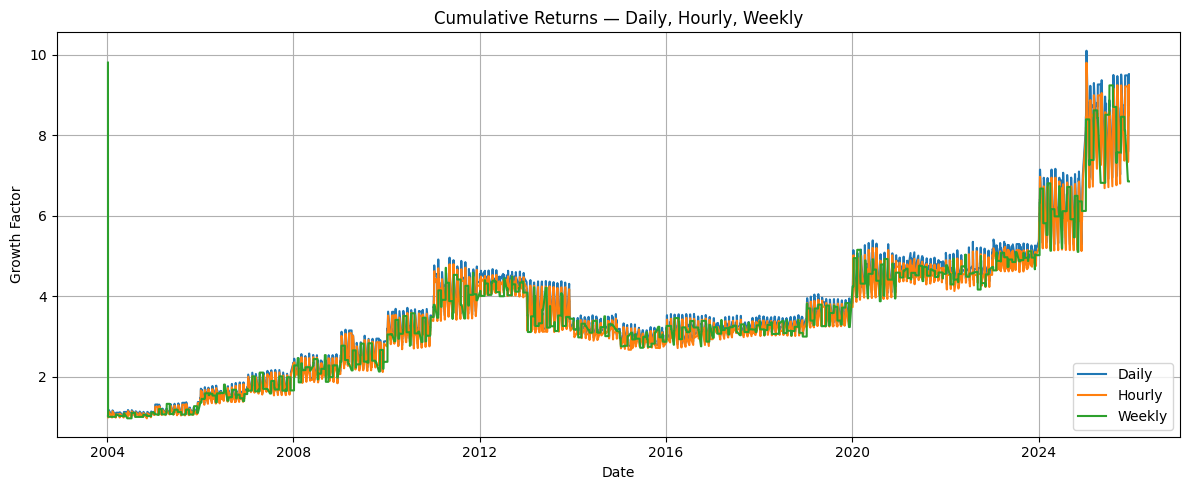

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

hourly = pd.read_csv('/content/hourly.csv')
daily = pd.read_csv('/content/daily.csv')
weekly = pd.read_csv('/content/weekly.csv')

# Strip whitespace from column names
daily.columns = daily.columns.str.strip()
hourly.columns = hourly.columns.str.strip()
weekly.columns = weekly.columns.str.strip()

# Convert Date columns to datetime
daily['Date'] = pd.to_datetime(daily['Date'], errors='coerce', dayfirst=False)
hourly['Date'] = pd.to_datetime(hourly['Date'], errors='coerce', dayfirst=False)
weekly['Date'] = pd.to_datetime(weekly['Date'], errors='coerce', dayfirst=False)

# AGGREGATE HOURLY TO DAILY

hourly_daily = hourly.groupby(hourly['Date'].dt.date).mean(numeric_only=True).reset_index()
hourly_daily['Date'] = pd.to_datetime(hourly_daily['Date'])

# MERGE ALL DATASETS

combined = pd.merge(daily, hourly_daily, on='Date', how='outer', suffixes=('_daily', '_hourly'))
combined = pd.merge(combined, weekly, on='Date', how='outer', suffixes=('', '_weekly'))

# Rename weekly columns to be consistent
for col in ['Open', 'High', 'Low', 'Close', 'Volume']:
    combined.rename(columns={col: f"{col}_weekly"}, inplace=True)

# CALCULATE RETURNS AND PRICE CHANGES

for timeframe in ['daily', 'hourly', 'weekly']:
    combined[f'Returns_{timeframe}'] = combined[f'Close_{timeframe}'].pct_change()
    combined[f'PriceChange_{timeframe}'] = combined[f'Close_{timeframe}'] - combined[f'Open_{timeframe}']

# TASK 1 — CORRELATION HEATMAP

cols_to_corr = [f"{x}_{tf}" for x in ['Open','High','Low','Close','Volume'] for tf in ['daily','hourly','weekly']]
plt.figure(figsize=(12,8))
sns.heatmap(combined[cols_to_corr].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap — Daily vs Hourly vs Weekly Gold Prices")
plt.tight_layout()
plt.show()

# TASK 2 — 30-DAY ROLLING VOLATILITY

plt.figure(figsize=(12,5))
for tf in ['daily','hourly','weekly']:
    combined[f'RollingVol30_{tf}'] = combined[f'Returns_{tf}'].rolling(30).std()
    plt.plot(combined['Date'], combined[f'RollingVol30_{tf}'], label=f"{tf.capitalize()} Volatility")

plt.title("30-Day Rolling Volatility — Daily, Hourly, Weekly")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# TASK 3 — SCATTER PLOT: VOLUME vs PRICE CHANGE

plt.figure(figsize=(10,6))
for tf in ['daily','hourly','weekly']:
    plt.scatter(combined[f'Volume_{tf}'], combined[f'PriceChange_{tf}'], alpha=0.5, label=f"{tf.capitalize()}")

plt.title("Volume vs Price Change — Daily, Hourly, Weekly")
plt.xlabel("Volume")
plt.ylabel("Price Change")
plt.legend()
plt.tight_layout()
plt.show()

# TASK 4 — CUMULATIVE RETURNS

plt.figure(figsize=(12,5))
for tf in ['daily','hourly','weekly']:
    combined[f'CumulativeReturns_{tf}'] = (1 + combined[f'Returns_{tf}']).cumprod()
    plt.plot(combined['Date'], combined[f'CumulativeReturns_{tf}'], label=f"{tf.capitalize()}")

plt.title("Cumulative Returns — Daily, Hourly, Weekly")
plt.xlabel("Date")
plt.ylabel("Growth Factor")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


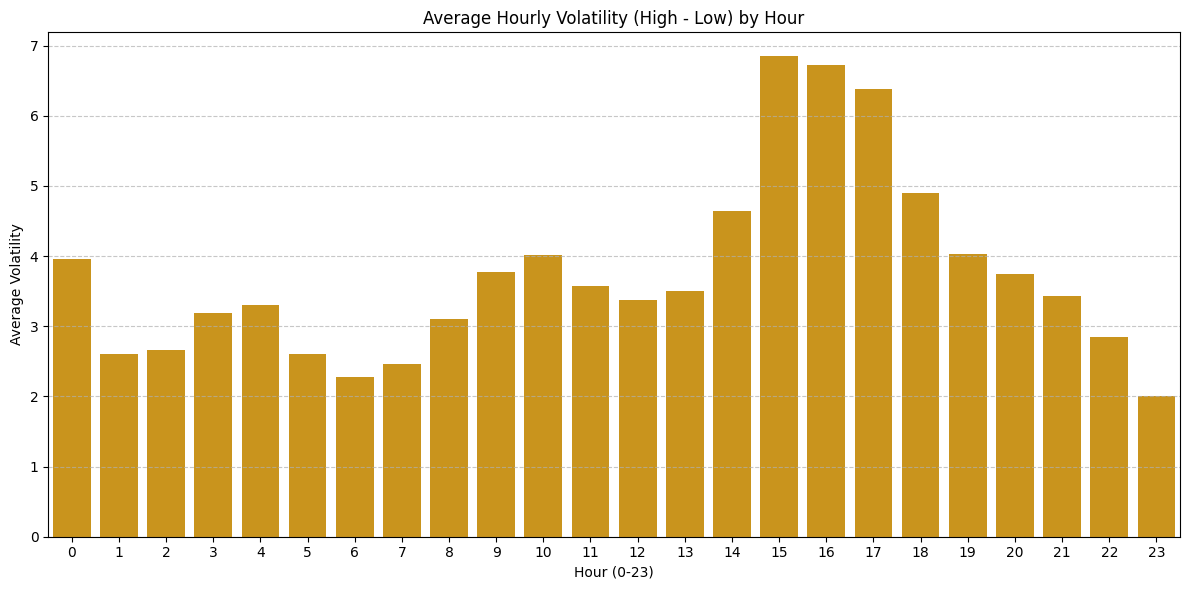

In [27]:
hourlydf['Volatility'] = hourlydf['High'] - hourlydf['Low']
hourlydf['Hour'] = hourlydf.index.hour

average_hourly_volatility = hourlydf.groupby('Hour')['Volatility'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Hour', y='Volatility', data=average_hourly_volatility, color='#E69F00')
plt.title('Average Hourly Volatility (High - Low) by Hour')
plt.xlabel('Hour (0-23)')
plt.ylabel('Average Volatility')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

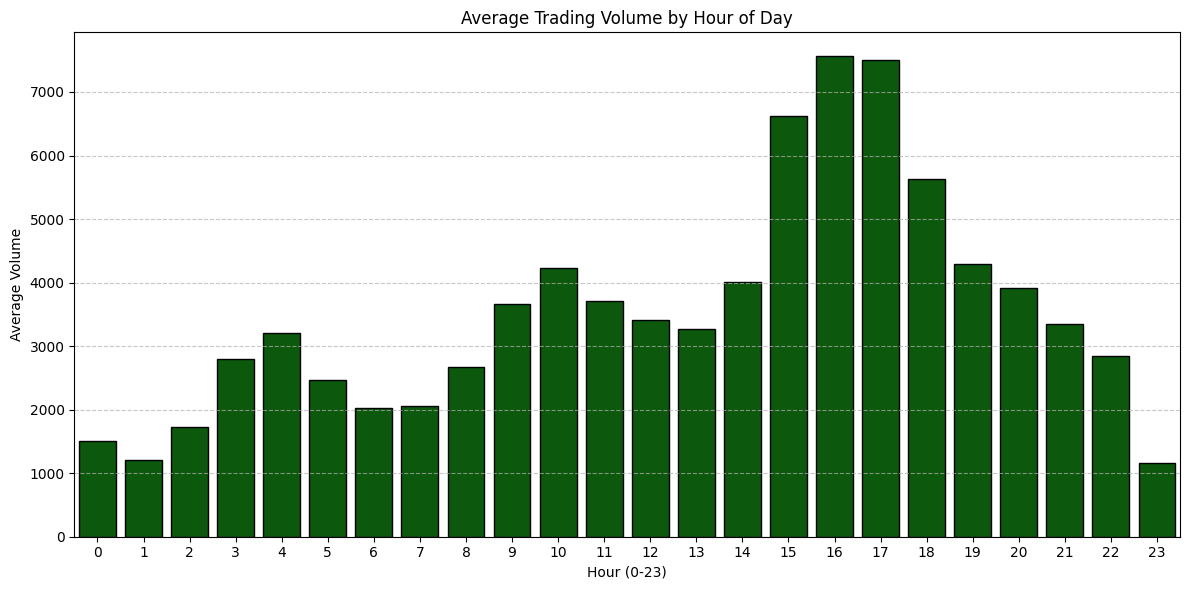

In [28]:
hourlydf['Hour'] = hourlydf.index.hour
average_hourly_volume = hourlydf.groupby('Hour')['Volume'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Hour', y='Volume', data=average_hourly_volume, color='darkgreen', edgecolor='black')
plt.title('Average Trading Volume by Hour of Day')
plt.xlabel('Hour (0-23)')
plt.ylabel('Average Volume')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
hourlydf['Price_Range'] = hourlydf['High'] - hourlydf['Low']

plt.figure(figsize=(10, 6))
sns.histplot(hourlydf['Price_Range'].dropna(), bins=50, kde=False, color='#F4D03F', edgecolor='black')
plt.title('Distribution of Hourly Price Range (High - Low)')
plt.xlabel('Hourly Price Range')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

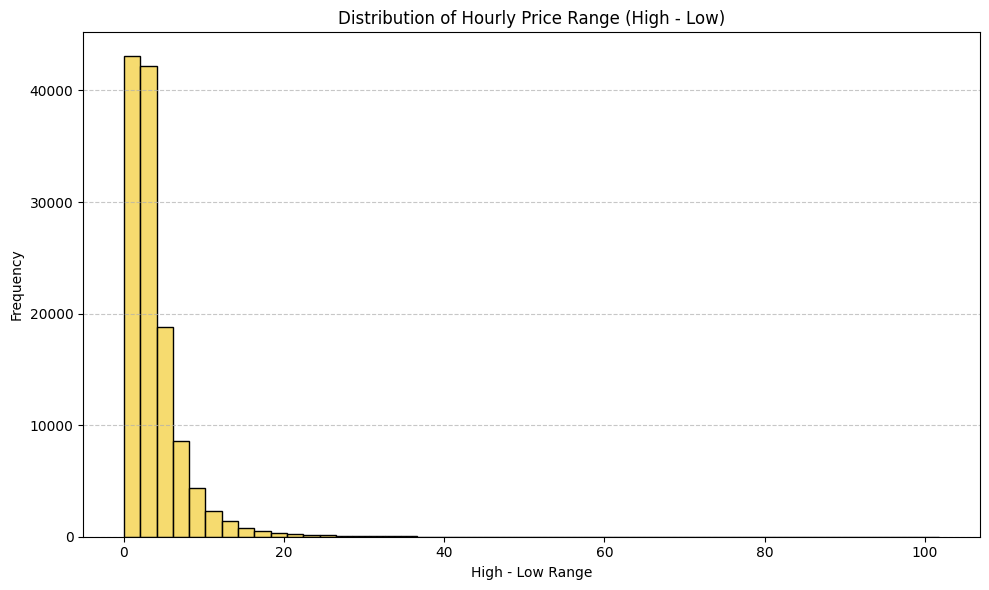

In [31]:
hourlydf['Price_Range'] = hourlydf['High'] - hourlydf['Low']

plt.figure(figsize=(10, 6))
sns.histplot(hourlydf['Price_Range'].dropna(), bins=50, color='#F4D03F', edgecolor='black')
plt.title('Distribution of Hourly Price Range (High - Low)')
plt.xlabel('High - Low Range')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

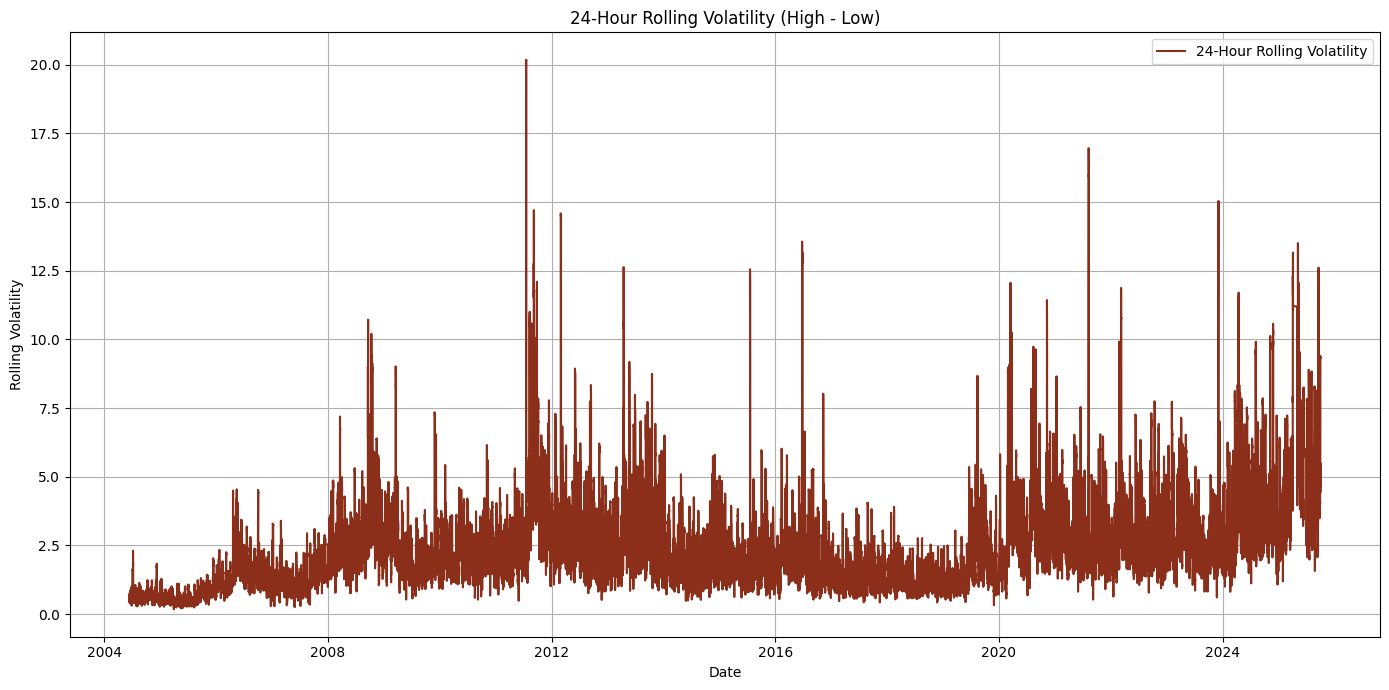

In [33]:
hourlydf['Price_Range'] = hourlydf['High'] - hourlydf['Low']
hourlydf['Rolling_Volatility_24H'] = hourlydf['Price_Range'].rolling(window=24).std()

plt.figure(figsize=(14, 7))
plt.plot(hourlydf.index, hourlydf['Rolling_Volatility_24H'], color='#8B2E1A', label='24-Hour Rolling Volatility')
plt.title('24-Hour Rolling Volatility (High - Low)')
plt.xlabel('Date')
plt.ylabel('Rolling Volatility')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()